In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/Simple Linear Regression/advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x= df[['TV','Radio','Newspaper']]
y= df['Sales']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model=LinearRegression()

In [8]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print(model.score(x_test,y_test))
y_predict=model.predict(x_test)

0.8927399621870804


In [10]:
model.coef_

array([0.05505215, 0.0979663 , 0.00258507])

# Upgrad

In [11]:
df1=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/Simple Linear Regression/advertising.csv')
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [13]:
df1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


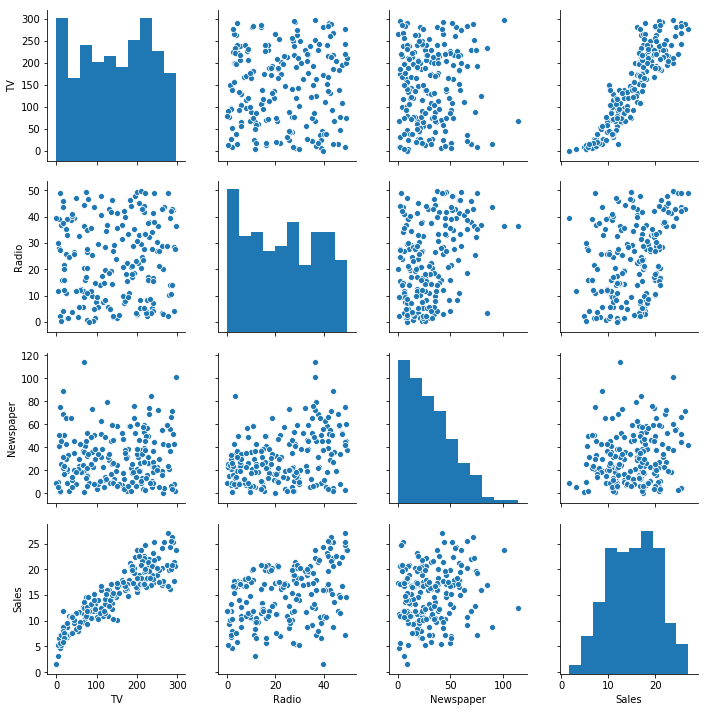

In [14]:
sns.pairplot(df1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


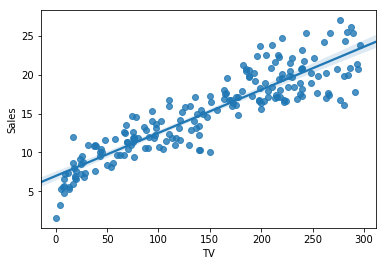

In [15]:
sns.regplot(x='TV',y='Sales',data=df1)

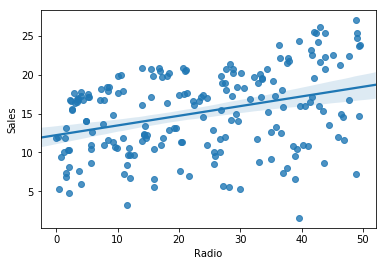

In [16]:
sns.regplot(x='Radio',y='Sales',data=df1)

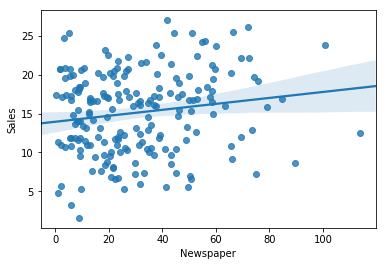

In [17]:
sns.regplot(x='Newspaper',y='Sales',data=df1)

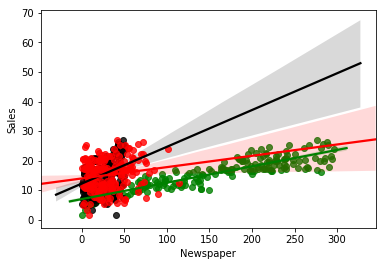

In [18]:
sns.regplot(x='TV',y='Sales',data=df1,color='g')
sns.regplot(x='Radio',y='Sales',data=df1,color='black')
sns.regplot(x='Newspaper',y='Sales',data=df1,color='r')

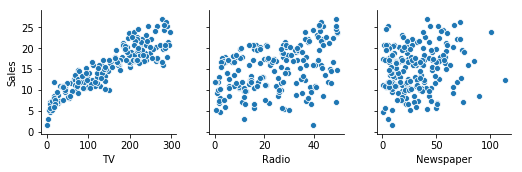

In [19]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=df1)

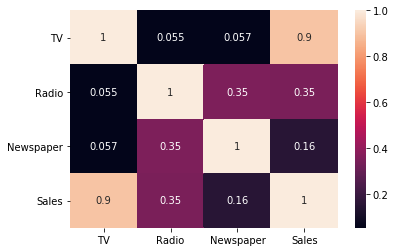

In [20]:
sns.heatmap(df1.corr(),annot=True)

In [21]:
x2=df1['TV']
y2=df1['Sales']

In [22]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.3)

In [23]:
x_train2[:3]

34    95.7
44    25.1
32    97.2
Name: TV, dtype: float64

In [24]:
y_train[:3]

158     7.3
176    20.2
191    11.9
Name: Sales, dtype: float64

In [25]:
import statsmodels.api as sm

In [26]:
x_train2_sm=sm.add_constant(x_train2)
x_train2_sm.head()

,const,TV
34,1.0,95.7
44,1.0,25.1
32,1.0,97.2
97,1.0,184.9
140,1.0,73.4


In [27]:
model=sm.OLS(y_train2,x_train2_sm)
model_lr=model.fit()

In [28]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     645.2
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           7.06e-54
Time:                        13:58:22   Log-Likelihood:                -315.39
No. Observations:                 140   AIC:                             634.8
Df Residuals:                     138   BIC:                             640.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0551      0.375     18.832      0.000       6.314       7.796
TV             0.0562      0.002     25.400      0.000       0.052       0.061
==============================================================================
Omnibus:                        0.559   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.481
Skew:                          -0.143   Prob(JB):                        0.786
Kurtosis:                       2.971   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


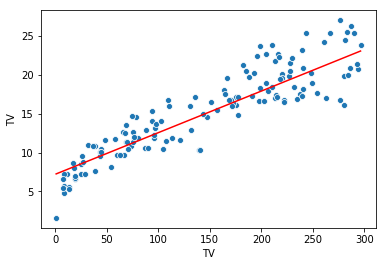

In [29]:
sns.scatterplot(x_train2,y_train2)
sns.lineplot(x_train2,7.2181+0.0534*x_train2,color='r')

In [30]:
y_pred=model_lr.predict(x_train2_sm)

In [31]:
res=y_pred-y_train2

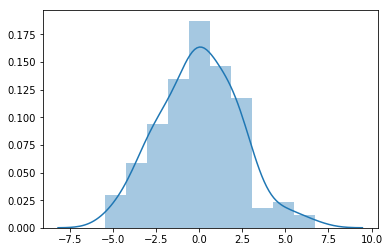

In [32]:
sns.distplot(res)

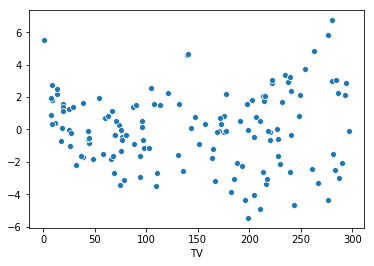

In [33]:
sns.scatterplot(x_train2,res)

In [34]:
x_test2_sm=sm.add_constant(x_test2)

In [35]:
y_test_pred=model_lr.predict(x_test2_sm)

In [36]:
from sklearn.metrics import r2_score

In [38]:
r2=r2_score(y_test2,y_test_pred)
r2

0.7696365156892553